# Teil - Praxis
https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding


Der Datensatz besteht aus 2 Teilen die zusammengehören.

Führe das Data PreProcessing und eine explorative Datenanalyse durch.

Welche Erkenntnisse können aus dem Datensatz gewonnen werden?

Verwende dabei verschiedene Plots.

Konzentriere dich auf ein Thema welches du analysieren möchtest. Bei den Plots reichen 3 aus. Diese sollen auf einen Blick das Thema verdeutlichen. Hier zählt Qualität statt Quantität!

Vergiss nicht die Erkenntnisse aus deinen Plots zu notieren.

Du arbeitest als Data Scientist in einem Start Up. Ihr habt vor einem Jahr euer Geschäft eröffnet und nun wollt ihr den nächsten Schritt gehen und eure Dienste erweitern. Euer Geschäftsmodell ist das Betreiben einer Plattform bei der sich Personen die eine Geschäftsidee haben, aber nicht das benötigte Geld, anmelden und für ihr Projekt innerhalb einer vorgegebenen Zeit Geld sammeln können. Auf der anderen Seite habt ihr Geldgeber, die gern ihr Geld in Projekte anlegen möchten und nach Investitionen suchen. Als Vermittler bringt eure Plattform also Geldnehmer und Geldgeber zusammen. Ihr verdient euer Geld mit einer Provision für jedes Projekt was auf eurer Plattform landet.

Deine Datenbasis ist die Historie eurer Plattform. Alle Projekte sind abgeschlossene Projekte, d.h. die Zeit, um für sein Projekt Geld zu sammeln ist abgelaufen. Euer Geschäftsmodell sieht es vor, dass die gesammelten Gelder ausgezahlt werden, auch wenn der Zielbetrag nicht erreicht wurde. 

In dem Datensatz gibt es KEINE Duplikate.


Der gesplittete Datensatz enthält folgende Spalten (inkl. Bedeutung):

    - funded_amount ... mit Ablauf der Projektsammelzeit erhaltener Betrag in USD
    - loan_amount ... Zielbetrag (Betrag dem man für das Projekt haben möchte) in USD
    - activity ... Unterkategory zu dem das Ziel des Projektes thematisch gehört
    - sector ... Oberkategory in den das Projekt thematisch fällt
    - use ... Kurzbeschreibung wofür das Geld verwendet werden soll
    - country_code ... Ländercode nach ISO Norm
    - country ... Ländername nach ISO Norm
    - region ... Region
    - currency ... Währung in den der funded_amount dann ausgezahlt wurde
    - term in months ... Dauer über die der Kredit ausgezahlt wurde
    - lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
    - borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Projekt initiiert haben
    - repayment interval ... Rückzahlungsmodalitäten/-rhythmus


In [158]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.cbook import boxplot_stats 
import pycountry

## Daten einlesen

### part1.csv einlsen

In [2]:
pd.read_csv("part1.csv", sep='\n').head()

,",funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval"
0,"0,300.0,300.0,Fruits & Vegetables,Food,""To buy..."
1,"1,575.0,575.0,Rickshaw,Transportation,to repai..."
2,"2,150.0,150.0,Transportation,Transportation,To..."
3,"3,200.0,200.0,Embroidery,Arts,to purchase an e..."
4,"4,400.0,400.0,Milk Sales,Food,to purchase one ..."


In [3]:
df_part1 = pd.read_csv("part1.csv", sep=',')
df_part1.head(3)  

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet


In [4]:
df_part1.shape

(335000, 14)

In [5]:
df_part1.columns

Index(['Unnamed: 0', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'use', 'country_code', 'country', 'region', 'currency',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval'],
      dtype='object')

In [6]:
df_part1.iloc[[384], :]

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
384,384,4300.0,4300.0,Animal Sales,Agriculture,to purchase pigs and food for animals.\r\n,EC,Ecuador,Cuenca,USD,8.0,108,"female, female, female, female, female, female...",irregular


### part2.csv einlsen

In [7]:
pd.read_csv("part2.csv", sep='\n')

,#funded_amount#loan_amount#activity#sector#use#country_code#country#region#currency#term_in_months#lender_count#borrower_genders#repayment_interval
0,0#175.0#175.0#Liquor Store / Off-License#Food#...
1,1#325.0#325.0#Livestock#Agriculture#to buy 3 z...
2,2#550.0#550.0#Food Stall#Food#to buy ingredien...
3,3#1300.0#1300.0#Cattle#Agriculture#to buy one ...
4,4#900.0#900.0#Consumer Goods#Personal Use#to b...
...,...
282001,"336200#0.0#25.0#Livestock#Agriculture#[True, u..."
282002,"336201#25.0#25.0#Livestock#Agriculture#[True, ..."
282003,336202#0.0#25.0#Games#Entertainment##KE#Kenya#...
282004,"336203#0.0#25.0#Livestock#Agriculture#[True, u..."


In [8]:
df_part2 = pd.read_csv("part2.csv", sep='#')
df_part2.head(3)  

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,175.0,175.0,Liquor Store / Off-License,Food,to purchase additional stock of coconut wine t...,PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
1,1,325.0,325.0,Livestock,Agriculture,to buy 3 zebus and food to fatten them up.,MG,Madagascar,Antsirabe,MGA,12.0,13,female,monthly
2,2,550.0,550.0,Food Stall,Food,to buy ingredients for her food-vending busine...,PH,Philippines,"Cordova, Cebu",PHP,5.0,6,female,irregular


In [9]:
df_part2.shape

(336205, 14)

In [10]:
df_part2.columns

Index(['Unnamed: 0', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'use', 'country_code', 'country', 'region', 'currency',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval'],
      dtype='object')

In [11]:
# df_part2.loc[df_part2.loc[:, 'Unnamed: 0'] !=  df_part2.index, : ]

In [12]:
# df_part1.loc[df_part1.loc[:, 'Unnamed: 0'] !=  df_part1.index, : ]

## Daten zusammenlegen

In [13]:
df_all= pd.concat([df_part1, df_part2])
# df_all = df_part1.merge(df_part2, how='outer')

In [14]:
df_all.shape

(671205, 14)

In [15]:
df_all.head(2)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular


In [16]:
df_all.columns

Index(['Unnamed: 0', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'use', 'country_code', 'country', 'region', 'currency',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval'],
      dtype='object')

In [17]:
df_all.drop(columns=['Unnamed: 0'], inplace = True)

In [18]:
# df_all.head(2)

## Daten Strukture anschauen 

In [19]:
df_all.dtypes

funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
term_in_months        float64
lender_count            int64
borrower_genders       object
repayment_interval     object
dtype: object

In [20]:
df_all.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
currency                  0
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [21]:
df_all.shape

(671205, 13)

### Spalte 'funded_amount'

In [22]:
df_all.funded_amount.describe()

count    671205.000000
mean        785.995061
std        1130.398941
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64

1. min und max Werte sind positive Zahlen
2. mean <> 50%, std > mean --> vermutlich gibt Ausreißer

### Spalte 'loan_amount'

In [23]:
df_all.loan_amount.describe()

count    671205.000000
mean        842.397107
std        1198.660073
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64

1. min und max Werte sind positive Zahlen
2. min Wert > 0 
3. mean <> 50%, std > mean --> vermutlich gibt Ausreißer

### Spalte 'activity'

In [24]:
tmp = df_all.activity.unique()
print(len(tmp))
tmp

163


array(['Fruits & Vegetables', 'Rickshaw', 'Transportation', 'Embroidery',
       'Milk Sales', 'Services', 'Dairy', 'Beauty Salon', 'Manufacturing',
       'Food Production/Sales', 'Wholesale', 'General Store',
       'Clothing Sales', 'Poultry', 'Tailoring', 'Sewing', 'Bakery',
       'Restaurant', 'Food Stall', 'Farming', 'Construction Supplies',
       'Personal Products Sales', 'Home Products Sales',
       'Natural Medicines', 'Fish Selling', 'Education provider',
       'Shoe Sales', 'Machinery Rental', 'Butcher Shop', 'Pigs',
       'Personal Expenses', 'Food Market', 'Cosmetics Sales',
       'Personal Housing Expenses', 'Retail', 'Energy', 'Grocery Store',
       'Construction', 'Agriculture', 'Motorcycle Transport',
       'Charcoal Sales', 'Food', 'Pharmacy', 'Fishing', 'Timber Sales',
       'Cattle', 'Electronics Repair', 'Electronics Sales', 'Vehicle',
       'Cafe', 'Blacksmith', 'Higher education costs', 'Used Clothing',
       'Fuel/Firewood', 'Upholstery', 'Catering',

In [25]:
df_all.groupby('activity', as_index=False).size().sort_values(by='size', ascending=False)

,activity,size
57,Farming,72955
72,General Store,64729
112,Personal Housing Expenses,32448
65,Food Production/Sales,28106
1,Agriculture,27023
...,...,...
58,Film,13
110,Personal Care Products,7
25,Celebrations,5
55,Event Planning,5


Spalte 'activity' besteht aus 163 uniquen Werte. Auf den ersten Blick gibt es keine "null" Werte

### Spalte 'sector'

In [26]:
tmp = df_all.sector.unique()
print(len(tmp))

tmp

15


array(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [27]:
df_all.groupby('sector', as_index=False).size().sort_values(by = 'size')

,sector,size
14,Wholesale,634
5,Entertainment,830
9,Manufacturing,6208
3,Construction,6268
7,Health,9223
1,Arts,12060
13,Transportation,15518
4,Education,31013
2,Clothing,32742
8,Housing,33731


Spalte 'sector' besteht aus 15 uniquen Werte. Auf den ersten Blick gibt es keine "null" Werte

### Spalten 'country_code', 'country' und 'region'

In [28]:
df_all.groupby('country_code', as_index=False).size()

,country_code,size
0,AF,2
1,AL,1934
2,AM,8631
3,AZ,1945
4,BF,2460
...,...,...
81,XK,1419
82,YE,2313
83,ZA,378
84,ZM,784


In [29]:
df_all.groupby('country', as_index=False).size()

,country,size
0,Afghanistan,2
1,Albania,1934
2,Armenia,8631
3,Azerbaijan,1945
4,Belize,125
...,...,...
82,Vietnam,10843
83,Virgin Islands,2
84,Yemen,2313
85,Zambia,784


Es gibt einen Code weniger als Ländernamen. Es gibt 8 null Werte in Spalte 'country_code' 

                    --> Siehe Abschnitt in 'Null Werte'

In [30]:
len(df_all.region.unique())

12696

Es gibt 56800 null Werte in Spalte 'region' 

                    --> Siehe Abschnitt in 'Null Werte'

### Spalte 'currency'

In [31]:
#currency 

df_all.currency.unique()

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'MWK', 'LAK', 'MMK', 'ZWD', 'MDL', 'SSP', 'SBD', 'CNY', 'EGP',
       'MGA', 'NAD', 'LSL', 'THB'], dtype=object)

### Spalte 'term_in_months'

In [32]:
df_all.term_in_months.describe()

count    671205.000000
mean         13.739022
std           8.598919
min           1.000000
25%           8.000000
50%          13.000000
75%          14.000000
max         158.000000
Name: term_in_months, dtype: float64

1. min und max Werte sind positive ganze Zahlen
2. min Wert > 0

### Spalte 'lender_count'

In [33]:
#lender_count
df_all.lender_count.describe() #!!! Ausreiser

count    671205.000000
mean         20.590922
std          28.459551
min           0.000000
25%           7.000000
50%          13.000000
75%          24.000000
max        2986.000000
Name: lender_count, dtype: float64

1. min und max Werte sind positive Zahlen
2. mean <> 50%, std > mean --> vermutlich gibt Ausreißer

### Spalte 'borrower_genders'

In [34]:
df_test = df_all.groupby('borrower_genders', as_index=False).size()
df_test

,borrower_genders,size
0,female,426502
1,"female, female",12164
2,"female, female, female",11676
3,"female, female, female, female",9052
4,"female, female, female, female, female",7568
...,...,...
11293,"male, male, male, male, male, male, male, male...",1
11294,"male, male, male, male, male, male, male, male...",5
11295,"male, male, male, male, male, male, male, male...",2
11296,"male, male, male, male, male, male, male, male...",1


Es gibt 4221 null Werte in Spalte 'borrower_genders' 

                    --> Siehe Abschnitt in 'Null Werte'

### Spalte 'repayment_interval'

In [35]:
df_all.repayment_interval.unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [36]:
df_all.groupby('repayment_interval', as_index=False).size()

,repayment_interval,size
0,bullet,70728
1,irregular,257158
2,monthly,342717
3,weekly,602


## Null Werte

### Spalte 'country_code'

In [37]:
df_all.loc[df_all.loc[:, 'country_code'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,6.0,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,6.0,159,male,bullet
9929,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7.0,120,female,bullet
16177,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,7.0,126,male,bullet
85953,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7.0,118,female,bullet
86218,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,NAD,7.0,150,male,bullet
152207,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,NAD,7.0,183,male,bullet
152653,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,NAD,7.0,183,female,bullet


In [38]:
# Namibia
# Versuchen den Code im Datensatz finden
df_all.loc[(df_all.loc[:, 'country'] == 'Namibia') & (df_all.loc[:, 'country_code'].notnull())]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval


    --> Beim Dateneinlesen wurde der Wert "NA" im Feld "Ländercode" als Null interpretiert.

8 null Werte in Spalte 'country_code' für Land 'Namibia'. 

        --> Man kann den richtigen ISO Code im Internet fiden und Daten ergänzen

In [39]:
df_all['country_code'] = df_all['country_code'].replace(np.nan, 'NA')

In [40]:
df_all.loc[df_all.loc[:, 'country_code'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval


In [41]:
df_all.groupby('country_code').size()

country_code
AF       2
AL    1934
AM    8631
AZ    1945
BF    2460
      ... 
XK    1419
YE    2313
ZA     378
ZM     784
ZW    4034
Length: 87, dtype: int64

In [42]:
df_all.country_code.unique()

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', 'NA', 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

### Spalte 'borrower_genders'

In [43]:
df_all.loc[df_all.loc[:, 'borrower_genders'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,20.0,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,10.0,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,20.0,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly


--> 4221 Nullwerte

In [44]:
df_all.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              0
country                   0
region                56800
currency                  0
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [45]:
df_all.loc[(df_all.loc[:, 'borrower_genders'].isnull()) & (df_all.loc[:, 'use'].isnull()) & (df_all.loc[:, 'region'].isnull())]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,20.0,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,10.0,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,20.0,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly


    --> Alle 4221 Zeile, wo 'borrower_genders' gleich null ist, haben auch null Werte für 'region' und 'use'

In [46]:
df_all.replace({'borrower_genders': np.nan}, 'unknown', inplace=True)

In [47]:
df_all.loc[df_all.loc[:, 'borrower_genders'] == 'unknown']

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,110,unknown,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,20.0,44,unknown,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,116,unknown,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,10.0,75,unknown,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,20.0,19,unknown,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,unknown,monthly
336174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,unknown,monthly
336178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,unknown,monthly
336185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,unknown,monthly


4221 ist weniger als 3% von gesamten Zahl von Daten. Diese Daten können gelöscht werden, aber ich brauche diese Spalte für Visualisirung nicht und möchte maximal Daten speichern. 

    --> Ich habe Nullwerte durch Wert 'unknown' ersetzt

### Spalte 'region'


In [48]:
print(f"{df_all.region.isnull().sum()} null Werte in Spalte 'region'")

56800 null Werte in Spalte 'region'


In [49]:
print(f"{round(df_all.region.isnull().sum() / df_all.shape[0] * 100, 2)} % von gesamten Zahl sind null Werte")

8.46 % von gesamten Zahl sind null Werte


In [50]:
df_to_supplement = df_all.loc[df_all.loc[:, 'region'].isnull()].groupby("country", as_index=False).size().sort_values('size')
df_to_supplement

,country,size
19,Georgia,1
5,Bhutan,1
32,Kyrgyzstan,1
21,Guam,1
12,Chile,1
...,...,...
54,Senegal,3231
66,United States,5173
52,Rwanda,6138
30,Kenya,8752


In [51]:
# df_to_supplement.merge(df_countries, how='left', left_on='country',
#                                             right_on='country', suffixes=('_to_supplement', '_total'))

In [52]:
# df_all.loc[df_all.loc[:, 'country'] == 'Georgia', :].groupby('region', as_index=False).size().sort_values('size', ascending=False)
#df_all.loc[df_all.loc[:, 'country'] == 'El Salvador', :].groupby('region', as_index=False).size().sort_values('size', ascending=False)

Es gibt zwei möglichkeit:
1. Füllen die Lücken mit dem Name von Region, der für das Land am häufigsten verwendeten, aus
2. Dropen ganze Spalte

--> Da nicht geplant ist, die Spalte für die weitere Analyse zu verwenden, wurde beschlossen, die Spalte vollständig zu löschen

In [53]:
df_all = df_all.drop('region', axis = 1)

In [54]:
df_all.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'currency', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval'],
      dtype='object')

In [55]:
df_all.isnull().sum()

funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                   4232
country_code             0
country                  0
currency                 0
term_in_months           0
lender_count             0
borrower_genders         0
repayment_interval       0
dtype: int64

### Spalte 'use'

In [56]:
df_all.loc[:, 'use'].isnull().sum()

4232

Die Spalte kann verwendet werden, um ein WordCloud zu erstellen. 

    --> Ergänzen die null Werte mit Werten aus den Spalten 'sector' und 'activity'

In [57]:
df_all.loc[df_all.loc[:, 'use'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,TZS,10.0,110,unknown,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,PEN,20.0,44,unknown,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,TZS,10.0,116,unknown,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,TZS,10.0,75,unknown,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,USD,20.0,19,unknown,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...
336151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13.0,0,unknown,monthly
336174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,KES,13.0,0,unknown,monthly
336178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13.0,0,unknown,monthly
336185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13.0,0,unknown,monthly


In [58]:
# df_no_nulls.loc[df_no_nulls.loc[:, 'use'].isnull()] = f"{df_no_nulls.loc[:, 'sector']} / {df_no_nully(lambda x: x[1] + x[2] if x[0] is None else x[0], axis=1)s.loc[:, 'activity']}"

In [59]:
# df_no_nulls = df_no_nulls.replace({'use', np.nan}, f"{df_no_nulls.loc[:, 'sector']} / {df_no_nulls.loc[:, 'activity']}")

In [60]:
df_all['use'] = df_all.loc[:, ['use', 'sector', 'activity']].apply(lambda x: x[1] + ' ' + x[2] if x[0] is np.nan else x[0], axis=1)

In [61]:
df_all.loc[df_all.loc[:, 'use'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval


## Features

### Anzahl der Startup-Teilnehmer

In [62]:
def get_gender_count1(str_t):
      
    num_male = 0
    num_female = 0

    str_l = str_t.split(', ')
    
    for s in str_l:            
        if s == 'male':
            num_male = num_male + 1
        elif s == 'female':
            num_female = num_female + 1

    return (num_male, num_female, len(str_l))

str_t = "male, male, female, female, male, male, male"

a, b, c = get_gender_count1(str_t)
print(a, b, c)


5 2 7


In [63]:
def get_gender_count(gender_list, gender):

    num = 0
    genders = gender_list.split(', ')
    for g in genders:
        if g == gender:
            num += 1
    return num

In [64]:
df_all['num_of_borrower'] = df_all.loc[:,'borrower_genders'].apply(lambda x: len(x.split(',')) if x != 'unknown' else 0)

In [65]:
df_all.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12.0,12,female,irregular,1
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11.0,14,"female, female",irregular,2
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43.0,6,female,bullet,1


In [66]:
df_all.loc[df_all.loc[:, 'borrower_genders'] == 'unknown'].head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower
140,2975.0,2975.0,Food Production/Sales,Food,Food Food Production/Sales,TZ,Tanzania,TZS,10.0,110,unknown,monthly,0
145,1200.0,1200.0,Personal Expenses,Personal Use,Personal Use Personal Expenses,PE,Peru,PEN,20.0,44,unknown,monthly,0
170,4250.0,4250.0,Catering,Food,Food Catering,TZ,Tanzania,TZS,10.0,116,unknown,monthly,0


In [67]:
df_all['num_male'] = df_all.loc[:,'borrower_genders'].apply(get_gender_count, gender= 'male')
df_all['num_female'] = df_all.loc[:,'borrower_genders'].apply(get_gender_count, gender ='female')

In [68]:
df_all.head()

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12.0,12,female,irregular,1,0,1
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11.0,14,"female, female",irregular,2,0,2
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43.0,6,female,bullet,1,0,1
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,11.0,8,female,irregular,1,0,1
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,14.0,16,female,monthly,1,0,1


In [69]:
df_all.loc[df_all['num_male'] + df_all['num_female'] != df_all['num_of_borrower']]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female


In [70]:
# df_no_nulls[['num_male','num_female','num_of_borrower']] = df_no_nulls.loc[:, 'borrower_genders'].apply(get_gender_count1)

### Ist Ziel erreicht?

In [71]:
df_all["difference"] = df_all.loc[:, 'funded_amount'] - df_all.loc[:, 'loan_amount']
# funded_amount         float64
# loan_amount           float64

In [72]:
df_all.loc[df_all.loc[:, "difference"] > 0] # -> 2

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference
277188,425.0,400.0,General Store,Retail,"to buy beverages, rice, laundry detergent, sug...",MZ,Mozambique,MZN,17.0,11,male,monthly,1,1,0,25.0
3159,3400.0,3000.0,Farm Supplies,Agriculture,"to pay for wires for the grape orchard, cover ...",AM,Armenia,USD,38.0,84,male,monthly,1,1,0,400.0


In [73]:
df_all.loc[df_all.loc[:, "difference"] == 0].shape # -> 619336 

(622875, 16)

In [74]:
df_all.loc[df_all.loc[:, "difference"] < 0].shape # -> 47646

(48328, 16)

In [75]:
df_all["goal_achieved"] = df_all.loc[:, ['funded_amount', 'loan_amount']].apply(lambda x: "yes" if x[0]- x[1] >=0 else "no", axis=1)

In [76]:
df_all.loc[df_all.loc[:, 'goal_achieved'] == 'no'].shape

(48328, 17)

In [77]:
df_all["difference"] = round(df_all.loc[:, 'funded_amount'] / df_all.loc[:, 'loan_amount'] *100, 2)
df_all.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12.0,12,female,irregular,1,0,1,100.0,yes
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11.0,14,"female, female",irregular,2,0,2,100.0,yes
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43.0,6,female,bullet,1,0,1,100.0,yes


In [78]:
df_all.loc[df_all.loc[:, "difference"] < 100].head(3)
        

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved
87,4275.0,5000.0,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",PS,Palestine,USD,39.0,58,male,monthly,1,1,0,85.50,no
112,1925.0,2400.0,Electronics Repair,Services,to pay the annual rent for his shop,IQ,Iraq,USD,15.0,41,male,monthly,1,1,0,80.21,no
186,2625.0,3000.0,Grocery Store,Food,to pay the annual rent on his grocery store an...,IQ,Iraq,USD,15.0,72,male,monthly,1,1,0,87.50,no


### 'Continent_Name' Spalte 

https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#pandas

In [79]:
countries_df = pd.read_csv("country-and-continent-codes-list-csv_csv.csv", sep=',')
countries_df.head(3) 

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0


In [80]:
countries_df.shape

(263, 6)

In [81]:
test = countries_df.groupby('Two_Letter_Country_Code', as_index=False).size()
test = test.loc[test.loc[:, 'size'] > 1, :]
test

,Two_Letter_Country_Code,size
6,AM,2
16,AZ,2
55,CY,2
79,GE,2
125,KZ,2
190,RU,2
224,TR,2
231,UM,2


In [82]:
codes_l = list(test.Two_Letter_Country_Code)
codes_l

['AM', 'AZ', 'CY', 'GE', 'KZ', 'RU', 'TR', 'UM']

In [83]:
countries_df.loc[countries_df.loc[:, 'Two_Letter_Country_Code'].isin(codes_l)]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0
16,Europe,EU,"Armenia, Republic of",AM,ARM,51.0
17,Asia,AS,"Armenia, Republic of",AM,ARM,51.0
58,Europe,EU,"Cyprus, Republic of",CY,CYP,196.0
59,Asia,AS,"Cyprus, Republic of",CY,CYP,196.0
83,Europe,EU,Georgia,GE,GEO,268.0
84,Asia,AS,Georgia,GE,GEO,268.0
116,Europe,EU,"Kazakhstan, Republic of",KZ,KAZ,398.0
117,Asia,AS,"Kazakhstan, Republic of",KZ,KAZ,398.0


In [84]:
countries_df = countries_df.drop_duplicates(['Country_Name', 'Two_Letter_Country_Code'])
countries_df.reset_index(inplace=True, drop=True)

In [85]:
countries_df.shape

(255, 6)

In [86]:
countries_df.loc[countries_df.loc[:, 'Two_Letter_Country_Code'].isin(codes_l)]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
15,Europe,EU,"Armenia, Republic of",AM,ARM,51.0
56,Europe,EU,"Cyprus, Republic of",CY,CYP,196.0
80,Europe,EU,Georgia,GE,GEO,268.0
112,Europe,EU,"Kazakhstan, Republic of",KZ,KAZ,398.0
166,Oceania,OC,United States Minor Outlying Islands,UM,UMI,581.0
185,Europe,EU,Russian Federation,RU,RUS,643.0
227,Europe,EU,"Turkey, Republic of",TR,TUR,792.0


In [87]:
countries_df.loc[countries_df.loc[:, 'Two_Letter_Country_Code'].isnull()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
147,Africa,AF,"Namibia, Republic of",NaN,NAM,516.0


In [88]:
countries_df['Two_Letter_Country_Code'] = countries_df['Two_Letter_Country_Code'].replace(np.nan, 'NA')

In [89]:
countries_df.loc[countries_df.loc[:, 'Continent_Name']=='NA']

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number


In [90]:
countries_df.isnull().sum()

Continent_Name                0
Continent_Code               42
Country_Name                  0
Two_Letter_Country_Code       0
Three_Letter_Country_Code     4
Country_Number                5
dtype: int64

In [91]:
three_letter_code_null = list(countries_df.loc[countries_df.loc[:, 'Three_Letter_Country_Code'].isnull()]['Two_Letter_Country_Code'])
three_letter_code_null

['XX', 'XE', 'XD', 'XS']

In [92]:
df_all.loc[df_all.loc[:, 'country_code'].isin(three_letter_code_null)]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved


---> Diese Länder sind nicht in unserem DataSet enthalten -> ignorieren null Werte in der Spalte 'Three_Letter_Country_Code'

In [93]:
df_all = df_all.merge(countries_df.loc[:, ['Continent_Name', "Two_Letter_Country_Code", "Three_Letter_Country_Code"]], 
                         left_on='country_code'
                         , right_on='Two_Letter_Country_Code'
                         , how='left')

In [94]:
df_all.loc[df_all.loc[:, 'Continent_Name'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Two_Letter_Country_Code,Three_Letter_Country_Code


In [95]:
df_all.shape

(671205, 20)

In [96]:
df_all.drop(columns=['Two_Letter_Country_Code'], inplace = True)

In [97]:
df_all.isnull().sum()

funded_amount                0
loan_amount                  0
activity                     0
sector                       0
use                          0
country_code                 0
country                      0
currency                     0
term_in_months               0
lender_count                 0
borrower_genders             0
repayment_interval           0
num_of_borrower              0
num_male                     0
num_female                   0
difference                   0
goal_achieved                0
Continent_Name               0
Three_Letter_Country_Code    0
dtype: int64

### GDP data

https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [98]:
gdp_df = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3469501.csv", skiprows=4)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.507808,146.910907,156.078705,182.115000,162.232750,180.087426,...,1734.938417,1712.686908,1701.765354,1546.877709,1429.596045,1571.307053,1573.221585,1527.734558,1356.699267,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1965.118485,2157.481149,2178.368454,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [99]:
gdp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [100]:
gdp_df.shape

(266, 66)

In [101]:
len(gdp_df.loc[(gdp_df.loc[:, '2020'].isnull())])


25

In [102]:
gdp_df_my = gdp_df.loc[:, ['Country Name', 'Country Code']]
gdp_df_my

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [103]:
def get_gdp_val(data, year):
    if year < 1960:
        return np.nan
    
    if pd.isnull(data[str(year)]):
        return get_gdp_val(data, year - 1)
        
    else:
        return round(data[str(year)], 2)

In [104]:
gdp_df_my['gdp'] = gdp_df.apply(lambda x: get_gdp_val(x, 2020), axis=1)
gdp_df_my

,Country Name,Country Code,gdp
0,Aruba,ABW,30253.28
1,Africa Eastern and Southern,AFE,1356.70
2,Afghanistan,AFG,516.75
3,Africa Western and Central,AFW,1710.07
4,Angola,AGO,1776.17
...,...,...,...
261,Kosovo,XKX,4346.64
262,"Yemen, Rep.",YEM,758.15
263,South Africa,ZAF,5655.87
264,Zambia,ZMB,985.13


In [105]:
gdp_df_my.isnull().sum()

Country Name    0
Country Code    0
gdp             5
dtype: int64

In [106]:
a = list(gdp_df_my['Country Code'])
b = list(df_all['Three_Letter_Country_Code'].unique())
c = [item for item in b if item not in a]
c

['XXK']

In [107]:
df_all.loc[df_all['Three_Letter_Country_Code'] == 'XXK', :].head(1)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code
1136,2050.0,2050.0,Construction,Construction,To purchase tools for the construction work th...,XK,Kosovo,EUR,22.0,55,female,monthly,1,0,1,100.0,yes,Europe,XXK


In [108]:
gdp_df_my.loc[gdp_df_my['Country Name'] == 'Kosovo', :]

,Country Name,Country Code,gdp
261,Kosovo,XKX,4346.64


In [109]:
gdp_df_my.loc[gdp_df_my['Country Name'] == 'Kosovo', 'Country Code'] = 'XXK'

In [110]:
df_all = df_all.merge(gdp_df_my.loc[:, ['Country Code', 'gdp']], how="left", left_on="Three_Letter_Country_Code", right_on="Country Code")

In [111]:
df_all.drop(columns=['Country Code'], inplace = True)

### Armutsrate

https://worldpopulationreview.com/country-rankings/poverty-rate-by-country

In [143]:
poverty_df = pd.read_csv("csvData.csv")
poverty_df

,country,percPoverty,dataYear,lessThan10,lessThan550
0,Equatorial Guinea,76.8,2006,NaN,NaN
1,South Sudan,76.4,2016,99.70,98.44
2,Madagascar,70.7,2012,99.41,97.09
3,Guinea-Bissau,69.3,2010,96.56,92.21
4,Eritrea,69.0,1993,NaN,NaN
...,...,...,...,...,...
167,United Arab Emirates,NaN,2019,0.73,0.00
168,Somalia,NaN,2019,99.63,97.87
169,Taiwan,NaN,2019,0.50,0.25
170,South Korea,NaN,2019,2.50,0.74


In [159]:
def ugly_country_lookup(name):
    try:
        alpha3 = pycountry.countries.search_fuzzy(name)[0].alpha_3
    except:
        alpha3 = np.nan
    return alpha3

In [161]:
poverty_df["country_code_alpha3"] = poverty_df["country"].apply(lambda x: ugly_country_lookup(x))

In [162]:
poverty_df.loc[poverty_df["country_code_alpha3"].isnull(), :]

,country,percPoverty,dataYear,lessThan10,lessThan550,country_code_alpha3
7,DR Congo,63.9,2012,99.39,96.78,NaN
38,Ivory Coast,39.5,2018,93.14,76.90,NaN
102,Laos,18.3,2018,90.71,69.51,NaN
161,Cape Verde,NaN,2019,65.72,34.23,NaN
170,South Korea,NaN,2019,2.50,0.74,NaN


In [165]:
poverty_df.loc[poverty_df["country"]=='DR Congo', 'country_code_alpha3'] = 'COD'
poverty_df.loc[poverty_df["country"]=='Ivory Coast', 'country_code_alpha3'] ='CIV'
poverty_df.loc[poverty_df["country"]=='Laos', 'country_code_alpha3'] ='LAO'

In [167]:
a = list(poverty_df['country_code_alpha3'])
b = list(df_all['Three_Letter_Country_Code'].unique())
c = [item for item in b if item not in a]
c

['XXK', 'VIR', 'VCT', 'GUM', 'PRI']

In [173]:
df_all.loc[df_all['Three_Letter_Country_Code'].isin(c), :].groupby(['Three_Letter_Country_Code', 'country'], as_index=False).size()

,Three_Letter_Country_Code,country,size
0,GUM,Guam,1
1,PRI,Puerto Rico,68
2,VCT,Saint Vincent and the Grenadines,16
3,VIR,Virgin Islands,2
4,XXK,Kosovo,1419


In [180]:
# https://data.worldbank.org/indicator/SI.POV.NAHC
poverty_df = poverty_df.append({'country': 'Kosovo', 'percPoverty' : 17.6, 'country_code_alpha3': 'XXK'}, ignore_index=True)

In [186]:
df_all = df_all.merge(poverty_df.loc[:, ['country_code_alpha3', 'percPoverty']], how="left", left_on="Three_Letter_Country_Code", right_on="country_code_alpha3")

In [187]:
df_all.loc[df_all['percPoverty'].isnull(), :].groupby(['country'], as_index=False).size()

,country,size
0,Belize,125
1,Guam,1
2,Puerto Rico,68
3,Saint Vincent and the Grenadines,16
4,Somalia,75
5,Suriname,223
6,Virgin Islands,2


In [189]:
df_all.drop(columns=['country_code_alpha3'], inplace = True)

### Bevölkerung des Landes

https://data.worldbank.org/indicator/SP.POP.TOTL

In [145]:
pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv", skiprows=4)
pop_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [146]:
pop_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [147]:
pop_df.shape

(266, 66)

In [148]:
len(pop_df.loc[(pop_df.loc[:, '2020'].isnull())])


2

In [149]:
pop_df_my = pop_df.loc[:, ['Country Name', 'Country Code']]
pop_df_my

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [150]:
pop_df_my['pop'] = pop_df.apply(lambda x: get_gdp_val(x, 2020), axis=1)
pop_df_my

,Country Name,Country Code,pop
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0
...,...,...,...
261,Kosovo,XKX,1775378.0
262,"Yemen, Rep.",YEM,29825968.0
263,South Africa,ZAF,59308690.0
264,Zambia,ZMB,18383956.0


In [151]:
pop_df_my.isnull().sum()

Country Name    0
Country Code    0
pop             1
dtype: int64

In [152]:
a = list(pop_df_my['Country Code'])
b = list(df_all['Three_Letter_Country_Code'].unique())
c = [item for item in b if item not in a]
c

['XXK']

In [153]:
pop_df_my.loc[pop_df_my['Country Name'] == 'Kosovo', 'Country Code'] = 'XXK'

In [154]:
df_all = df_all.merge(pop_df_my.loc[:, ['Country Code', 'pop']], how="left", left_on="Three_Letter_Country_Code", right_on="Country Code")

In [155]:
df_all.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'currency', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval', 'num_of_borrower', 'num_male',
       'num_female', 'difference', 'goal_achieved', 'Continent_Name',
       'Three_Letter_Country_Code', 'gdp', 'project_size', 'Country Code',
       'pop'],
      dtype='object')

In [156]:
df_all.drop(columns=['Country Code'], inplace = True)

### Größe des Projekts abhängig von der Höhe des angeforderten Geldes 

In [112]:
print(min(boxplot_stats(df_all.funded_amount).pop(0)['fliers']))
print(max(df_all.funded_amount))

1895.0
100000.0


In [113]:
liste_category = ["without investments", 'small', 'medium', 'large', 'very large', 'extrem large']

df_all["project_size"] = pd.cut(df_all.loc[:, "funded_amount"], bins=[-1, 0, 275, 500, 1000, 1949, 100000], labels = liste_category)

df_all.head(2)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,...,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code,gdp,project_size
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12.0,12,...,irregular,1,0,1,100.0,yes,Asia,PAK,1188.86,medium
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11.0,14,...,irregular,2,0,2,100.0,yes,Asia,PAK,1188.86,large


In [114]:
df_all.loc[df_all.loc[:, "project_size"] == np.nan]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,...,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code,gdp,project_size


In [115]:
df_all.loc[df_all.loc[:, "project_size"] == "without investments"].head(2)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,...,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code,gdp,project_size
4814,0.0,5000.0,Food Production/Sales,Food,grow and create new jobs in my company.,US,United States,USD,24.0,0,...,bullet,1,0,1,0.0,no,North America,USA,63413.51,without investments
6784,0.0,10000.0,Cosmetics Sales,Retail,start a new stream of income by offering retai...,US,United States,USD,36.0,0,...,bullet,1,1,0,0.0,no,North America,USA,63413.51,without investments


In [116]:
df_all.loc[df_all.loc[:, "project_size"] == 'very large'].head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,...,repayment_interval,num_of_borrower,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code,gdp,project_size
64,1500.0,1500.0,Personal Housing Expenses,Housing,to purchase timber and zinc to build a new house,KH,Cambodia,USD,20.0,26,...,monthly,1,0,1,100.0,yes,Asia,KHM,1543.67,very large
69,1075.0,1075.0,Transportation,Transportation,to pay for general maintenance on his vehicle.,PE,Peru,PEN,17.0,41,...,monthly,1,1,0,100.0,yes,South America,PER,6126.87,very large
78,1550.0,1550.0,Retail,Retail,to buy business tailoring materials and sacks ...,TZ,Tanzania,TZS,10.0,46,...,irregular,4,0,4,100.0,yes,Africa,TZA,1076.47,very large


## Speicherplatz optimieren

In [192]:
df_all.memory_usage(deep= True)

Index                         5450728
funded_amount                 5450728
loan_amount                   5450728
activity                     47225895
sector                       44293235
use                          81035994
country_code                 40199119
country                      44572678
currency                     40880460
term_in_months                5450728
lender_count                  5450728
borrower_genders             47796674
repayment_interval           44038677
num_of_borrower               5450728
num_male                      5450728
num_female                    5450728
difference                    5450728
goal_achieved                40831133
Continent_Name               43452417
Three_Letter_Country_Code    40880460
gdp                           5450728
project_size                   681912
pop                           5450728
percPoverty                   5450728
dtype: int64

In [193]:
df_all.dtypes

funded_amount                 float64
loan_amount                   float64
activity                       object
sector                         object
use                            object
country_code                   object
country                        object
currency                       object
term_in_months                float64
lender_count                    int64
borrower_genders               object
repayment_interval             object
num_of_borrower                 int64
num_male                        int64
num_female                      int64
difference                    float64
goal_achieved                  object
Continent_Name                 object
Three_Letter_Country_Code      object
gdp                           float64
project_size                 category
pop                           float64
percPoverty                   float64
dtype: object

In [194]:
df_opti = df_all.copy()

### zum Category Typ

In [195]:
df_opti.loc[:,
    ['activity', 'country_code', 'currency', 'repayment_interval', 'goal_achieved', 'sector', 'country', 'Three_Letter_Country_Code']
           ] = df_opti.loc[:,
    ['activity', 'country_code', 'currency', 'repayment_interval', 'goal_achieved', 'sector', 'country', 'Three_Letter_Country_Code']
                          ].astype("category")

    --> Es wurde beschlossen, die Spalten 'sector', 'country', 'country_code' als Objekttyp zu beibehalten. Während der Visualisierung stieß ich auf Probleme beim Gruppieren von kategorialen Daten.

In [196]:
df_opti.dtypes

funded_amount                 float64
loan_amount                   float64
activity                     category
sector                       category
use                            object
country_code                 category
country                      category
currency                     category
term_in_months                float64
lender_count                    int64
borrower_genders               object
repayment_interval           category
num_of_borrower                 int64
num_male                        int64
num_female                      int64
difference                    float64
goal_achieved                category
Continent_Name                 object
Three_Letter_Country_Code    category
gdp                           float64
project_size                 category
pop                           float64
percPoverty                   float64
dtype: object

### Float spalte optimieren

In [197]:
df_opti.loc[:,
            ["funded_amount","loan_amount", "term_in_months", "difference", 'gdp', 'pop', 'percPoverty']] = df_opti.loc[:,
            ["funded_amount","loan_amount", "term_in_months", "difference", 'gdp', 'pop', 'percPoverty']].apply(pd.to_numeric, downcast="float")

In [198]:
df_opti.dtypes

funded_amount                 float32
loan_amount                   float32
activity                     category
sector                       category
use                            object
country_code                 category
country                      category
currency                     category
term_in_months                float32
lender_count                    int64
borrower_genders               object
repayment_interval           category
num_of_borrower                 int64
num_male                        int64
num_female                      int64
difference                    float32
goal_achieved                category
Continent_Name                 object
Three_Letter_Country_Code    category
gdp                           float32
project_size                 category
pop                           float32
percPoverty                   float32
dtype: object

### Integer spalte optimieren

In [199]:
df_opti.loc[:,["num_of_borrower","num_male","num_female", "lender_count"]] = df_opti.loc[:,["num_of_borrower","num_male","num_female", "lender_count"]].apply(pd.to_numeric, downcast="integer")

In [200]:
df_opti.dtypes

funded_amount                 float32
loan_amount                   float32
activity                     category
sector                       category
use                            object
country_code                 category
country                      category
currency                     category
term_in_months                float32
lender_count                    int16
borrower_genders               object
repayment_interval           category
num_of_borrower                  int8
num_male                         int8
num_female                       int8
difference                    float32
goal_achieved                category
Continent_Name                 object
Three_Letter_Country_Code    category
gdp                           float32
project_size                 category
pop                           float32
percPoverty                   float32
dtype: object

In [201]:
df_opti.memory_usage(deep=True)

Index                         5450728
funded_amount                 2725364
loan_amount                   2725364
activity                      1378143
sector                         682888
use                          81035994
country_code                   688578
country                        689165
currency                       687465
term_in_months                2725364
lender_count                  1362682
borrower_genders             47796674
repayment_interval             681769
num_of_borrower                681341
num_male                       681341
num_female                     681341
difference                    2725364
goal_achieved                  681568
Continent_Name               43452417
Three_Letter_Country_Code      688665
gdp                           2725364
project_size                   681912
pop                           2725364
percPoverty                   2725364
dtype: int64

In [202]:
# gesamte in-memory-Speicherplatzreduzierung

reduction = (df_all.memory_usage(deep=True).sum()-df_opti.memory_usage(deep=True).sum())/df_all.memory_usage(deep=True).sum() *  100

print(f"{reduction:0.2f}%")

64.38%


## Ausreißer

<AxesSubplot:xlabel='funded_amount'>

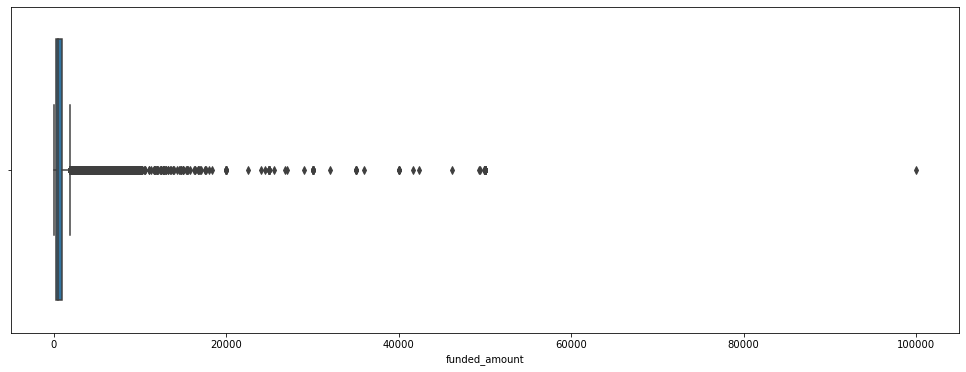

In [129]:
fig, axes = plt.subplots(figsize=(17,6))

sns.boxplot(x='funded_amount', data= df_opti)

In [130]:
boxplot_stats(df_opti.funded_amount).pop(0)['fliers']

array([2225., 3175., 3175., ..., 2700., 2650., 3525.], dtype=float32)

<AxesSubplot:xlabel='loan_amount'>

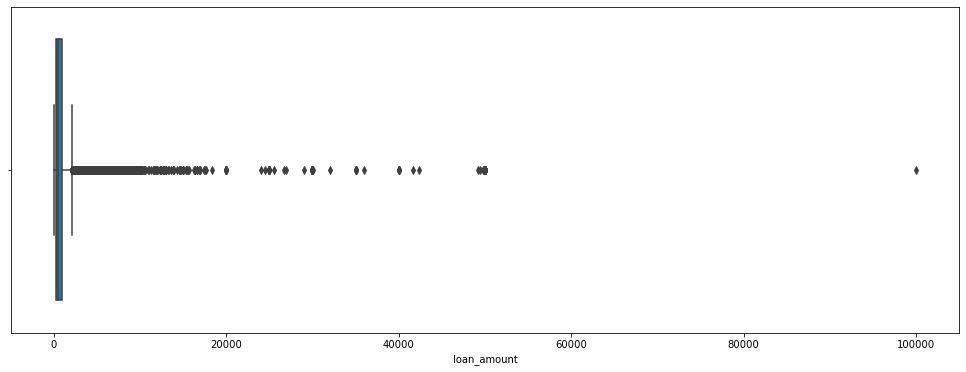

In [131]:
fig, axes = plt.subplots(figsize=(17,6))
sns.boxplot(x='loan_amount', data= df_opti)

In [132]:
len(boxplot_stats(df_opti.loan_amount).pop(0)['fliers'])

50993

--> Die meisten Spendenprojekte sind kleine Projekte. Aber da gibl viel Ausreißer. Der Datensatz enthält auch extrem große Projekte

<AxesSubplot:xlabel='term_in_months'>

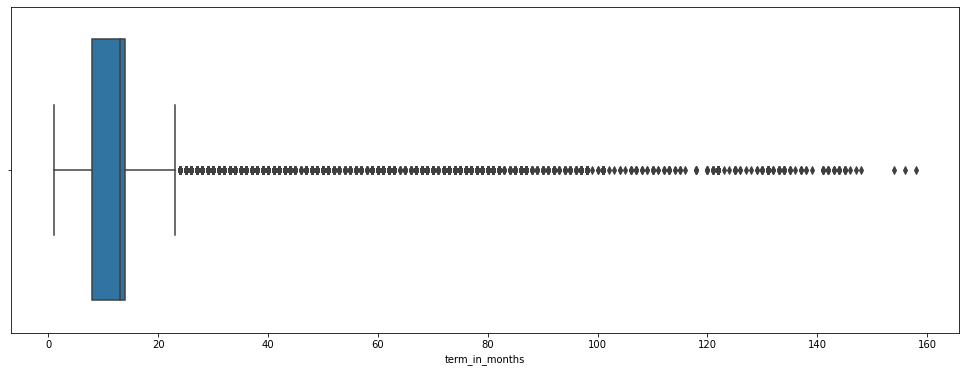

In [133]:
fig, axes = plt.subplots(figsize=(17,6))
sns.boxplot(x='term_in_months', data= df_opti)

<AxesSubplot:xlabel='lender_count'>

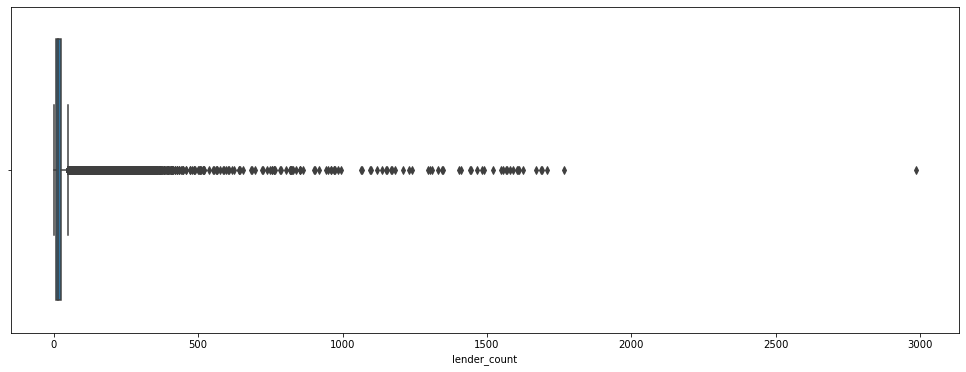

In [134]:

fig, axes = plt.subplots(figsize=(17,6))
sns.boxplot(x='lender_count', data= df_opti)

<AxesSubplot:xlabel='num_of_borrower'>

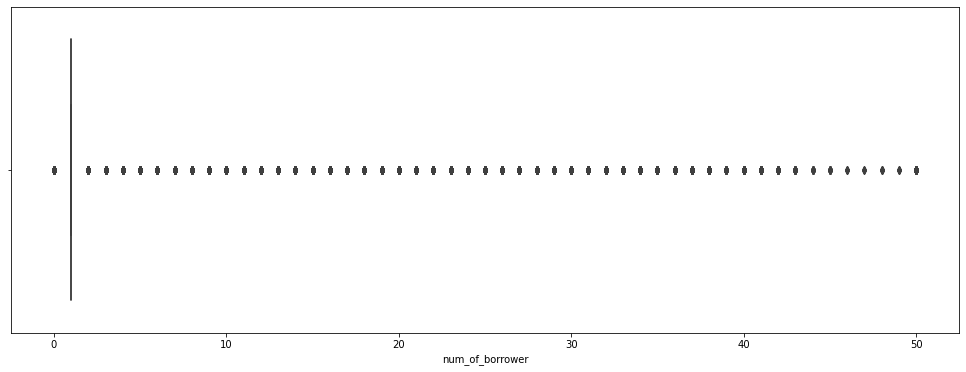

In [135]:
# num_of_borrower
fig = plt.figure(figsize=(17,6))
sns.boxplot(x='num_of_borrower', data= df_opti)

## Pairplot

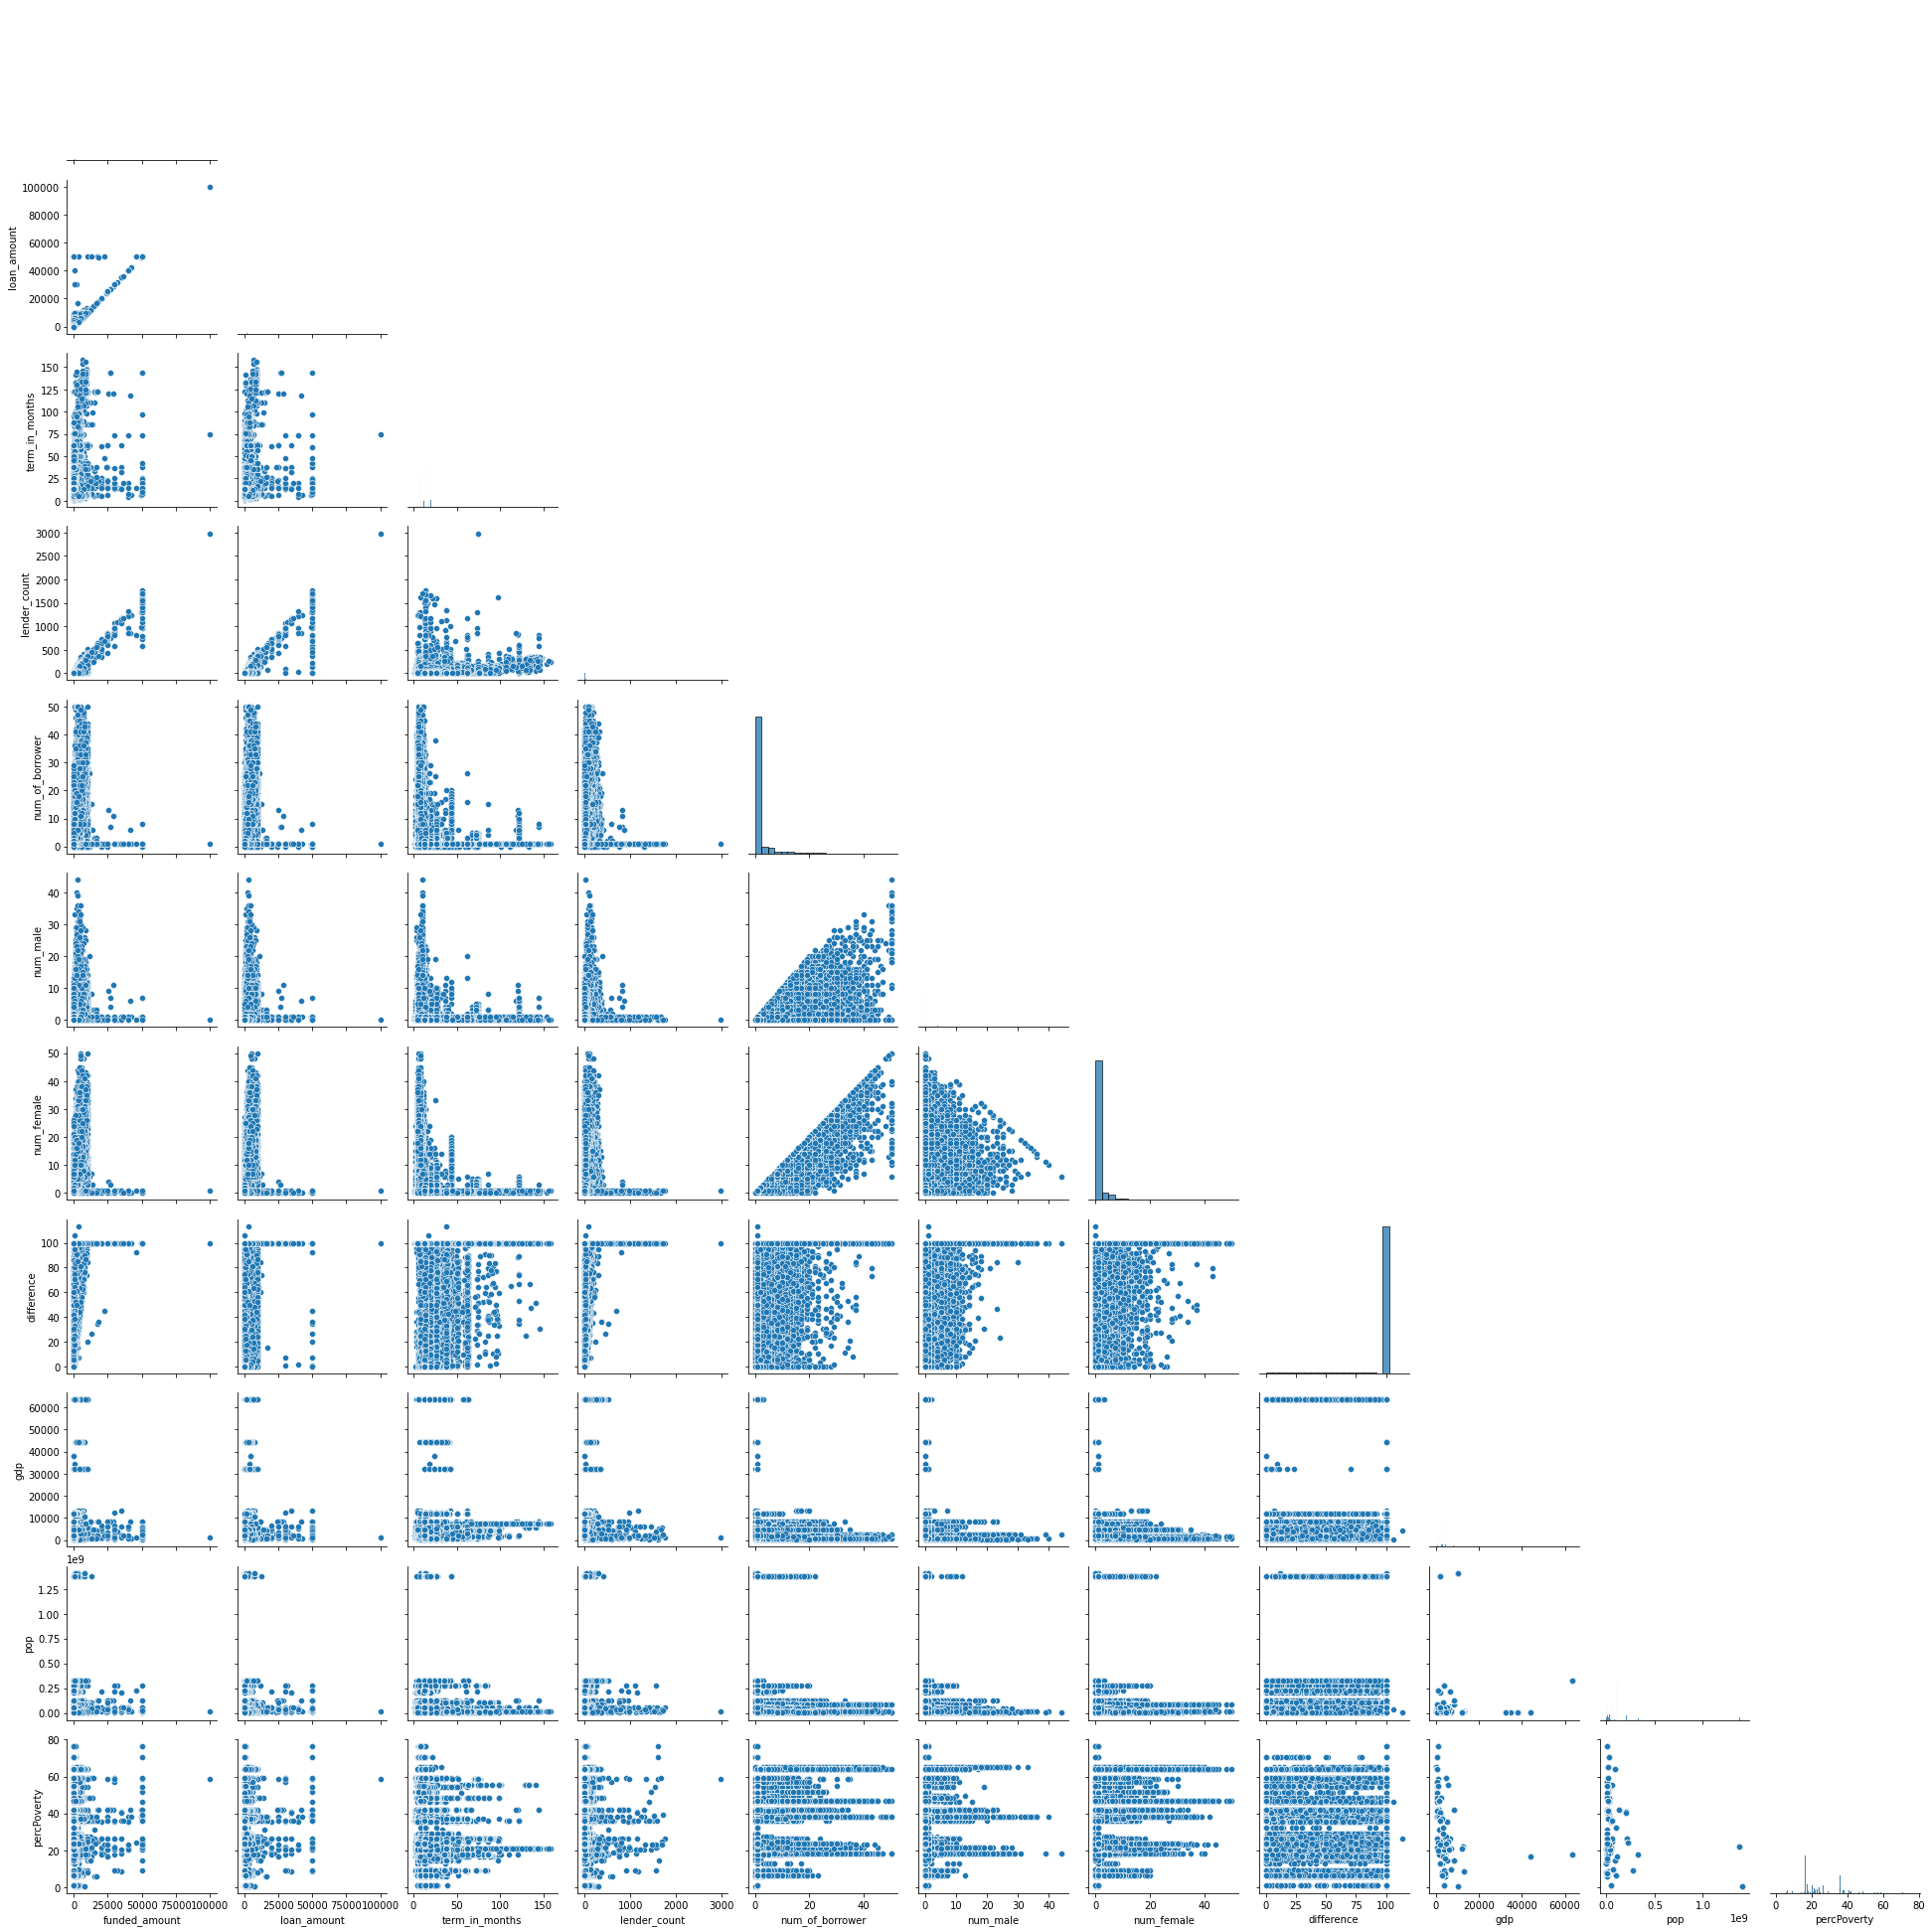

In [203]:
sns.pairplot(df_opti, corner=True)

Erkenntnisse:

1. "loan_amount - funded_amount":  Es besteht eine Beziehung zwischen dem angeforderten und dem gesammelten Geldbetrag. Vermutlich wurde bei den meisten Projekten das Spendenziel erreicht. Es gibt eine kleine Anzahl großer Projekte, die es nicht geschafft haben, genug Geld zu sammeln

2. "lender_count - funded_amount": Je mehr Geld Sie sammeln müssen, desto mehr Investoren beteiligen sich an dem Projekt
3. "term_in_month - funded_amount": Je mehr Geld für das Projekt gesammelt wurde, desto eher werden Geld ausgezaht.
4. "lender_count - term_in_month": Je mehr Menschen investiert haben, desto schneller muss das Geld zurückgegeben werden


## pkl. Datei speichern

In [204]:
df_opti.shape

(681341, 23)

In [205]:
df_opti.to_pickle('df_after_preprocessing.pkl')

In [206]:
df_opti.isnull().sum()

funded_amount                  0
loan_amount                    0
activity                       0
sector                         0
use                            0
country_code                   0
country                        0
currency                       0
term_in_months                 0
lender_count                   0
borrower_genders               0
repayment_interval             0
num_of_borrower                0
num_male                       0
num_female                     0
difference                     0
goal_achieved                  0
Continent_Name                 0
Three_Letter_Country_Code      0
gdp                            0
project_size                   0
pop                            0
percPoverty                  510
dtype: int64

In [207]:
df_opti.loc[df_opti.loc[:, 'Continent_Name'].isnull()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,...,num_male,num_female,difference,goal_achieved,Continent_Name,Three_Letter_Country_Code,gdp,project_size,pop,percPoverty


----------------------------